# Exercise 3 | TKO_7092 Evaluation of Machine Learning Methods 2023
## deadline: 15.2.2023 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Juuso Pyykkönen

Student number: 522060

Student email: jhpyyk@utu.fi

********************************************

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=5 (5NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 5-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 5NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 for help). Estimate the water permeability prediction performance (using 5NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 250 (that is, 10 meter intervals from 0m to 250m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. Remember to also take advantage of earlier exercises (e.g. C-index). For the 5-nearest neighbor and Euclidean distance calculation you can use third-party libraries (e.g. Scikit-learn) if you want. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value. 


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [58]:
# In this cell, import all the libraries that you need. For example: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

### Read in the datasets

In [59]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).
#
# Note that the coordinates are in EUREF-TM35FIN format, so you 
# can use the Euclidean distance to calculate the distance between two coordinate points.

# Read csv-files to dataframes and give a name to columns where possible 
feature_data = pd.read_csv('input.csv', header=None, sep=',')
coordinates = pd.read_csv('coordinates.csv', header=None, sep=',', names=['coord_x', 'coord_y'])
perm_values = pd.read_csv('output.csv', header=None, sep=',', names=['perm_value'])

# Use for referencing all feature columns
features = list(range(75))

# Gather data to single dataframe
data = pd.concat([feature_data, coordinates, perm_values], axis='columns')

# Check for NaN values
print('NaN values count:', data.isna().sum().sum())

# Check that the data is correctly loaded
data

NaN values count: 0


,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,coord_x,coord_y,perm_value
0,-0.053196,-0.219296,0.210020,0.704425,0.339477,0.412638,0.331074,-0.034411,-0.184481,0.307345,...,-0.519918,-0.447089,0.554097,0.087285,-0.109193,-0.913639,-0.461479,459140.0,7524200.0,5.8359
1,-0.632098,-0.682804,-0.285522,-0.369542,-0.138305,2.489725,2.051755,-0.034411,-0.246906,-0.226797,...,2.475438,-0.447089,-0.288927,-0.035919,-1.481978,-1.087664,-0.461479,461590.0,7549000.0,6.2592
2,-0.674980,-0.597421,-0.568689,-0.983237,-0.828435,-0.496087,-0.451053,-0.034411,-0.324938,-0.627405,...,-0.519918,-0.447089,-0.375320,-0.159124,0.349947,0.134707,-0.809315,462040.0,7549300.0,6.9041
3,-0.331927,-0.154649,1.307292,0.090730,0.419107,1.061728,0.956776,-0.034411,-0.301529,-0.360333,...,-0.519918,-0.447089,-0.383278,0.703308,0.467238,0.107450,-0.832933,462040.0,7549300.0,6.2065
4,-0.610657,-0.673046,-0.161636,-0.522966,-0.377196,0.672274,0.800351,-0.034411,-0.363954,-0.961244,...,0.977760,1.960643,-0.296657,0.087285,-0.333328,-0.636876,-0.542584,462130.0,7549400.0,7.0642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,2.316013,2.256813,-0.020053,0.551001,0.233303,-1.404813,-1.233180,-0.034411,-0.410773,-1.161547,...,-0.519918,-0.447089,-0.510368,0.333694,-0.605155,-0.869609,-1.089263,513840.0,7547100.0,6.7745
1687,-0.589216,-0.625475,-1.542075,-1.903780,-2.022890,-1.404813,-1.233180,-0.034411,-0.410773,-1.161547,...,-0.519918,-0.447089,2.831260,-0.405533,1.917122,4.751621,8.761618,514920.0,7556000.0,5.1985
1688,0.472103,0.671127,0.103833,0.397577,0.100586,-0.625905,-0.607478,-0.034411,2.835360,0.307345,...,-0.519918,-0.447089,1.145896,1.072921,2.184146,3.527153,2.258910,514990.0,7555500.0,4.6098
1689,-0.750022,-0.734034,-1.630565,-2.057204,-2.235238,-1.404813,-1.233180,-0.034411,-0.410773,-1.161547,...,-0.519918,-0.447089,3.594710,-0.405533,1.289039,4.411957,11.258372,515000.0,7556300.0,5.8530


### Standardization of the predictor features (input.csv)

In [60]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this.

scaler = StandardScaler()
# Scale the data
data[features]  = scaler.fit_transform(data[features])

# Check
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,coord_x,coord_y,perm_value
0,-0.053196,-0.219296,0.210020,0.704425,0.339477,0.412638,0.331074,-0.034411,-0.184481,0.307345,...,-0.519918,-0.447089,0.554097,0.087285,-0.109193,-0.913639,-0.461479,459140.0,7524200.0,5.8359
1,-0.632098,-0.682804,-0.285522,-0.369542,-0.138305,2.489725,2.051755,-0.034411,-0.246906,-0.226797,...,2.475438,-0.447089,-0.288927,-0.035919,-1.481978,-1.087664,-0.461479,461590.0,7549000.0,6.2592
2,-0.674980,-0.597421,-0.568689,-0.983237,-0.828435,-0.496087,-0.451053,-0.034411,-0.324938,-0.627405,...,-0.519918,-0.447089,-0.375320,-0.159124,0.349947,0.134707,-0.809315,462040.0,7549300.0,6.9041


### Functions

In [61]:
# Include here all the functions (for example the C-index-function) that you need in order to implement the task.

def cindex(y, yp):
    n = 0
    h_num = 0 
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n

# Spatial leave-one-out cross-validation
def sloocv(X, y, coords, distance, kneigh):

    true_y = []
    pred_y = []

    for test_index in range(len(X)):
        # Set leave-one-out train index
        train_index = list(range(0, len(X)))
        new_train_index = []
        
        # Loop in reverse to avoid index out of bounds error
        for i in range(len(train_index)):
            # Euclidean distance
            dist_from_test = np.linalg.norm(coords[i] - coords[test_index], ord=2)

            if dist_from_test > distance:
                new_train_index.append(i)

        # Fit a model and predict
        kneigh.fit(X[new_train_index], y[new_train_index])
        pred = kneigh.predict(X[test_index].reshape(1,-1))

        # Append prediction and true label
        true_y.append(y[test_index])
        pred_y.append(pred)

    return true_y, pred_y

### Results for spatial leave-one-out cross-validation with 5-nearest neighbor regression model

In [62]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 5-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.

# Distances in 10m intervals from 0m to 250m
distances = np.arange(start=0, stop=260, step=10)
c_indices = []
kneigh_5 = KNeighborsRegressor(n_neighbors=5)

for d in distances:
    true_y, pred_y = sloocv(data[features].to_numpy(), data['perm_value'].to_numpy(), data[['coord_x', 'coord_y']].to_numpy(), d, kneigh=kneigh_5)
    c_ind = cindex(true_y, pred_y)
    c_indices.append(c_ind)
    print(f'For dead zone radius {d}m, the C-index is {c_ind}')

For dead zone radius 0m, the C-index is 0.7130530889828076
For dead zone radius 10m, the C-index is 0.7036250103243743
For dead zone radius 20m, the C-index is 0.7070628519911694
For dead zone radius 30m, the C-index is 0.7055855915131543
For dead zone radius 40m, the C-index is 0.6982878337572743
For dead zone radius 50m, the C-index is 0.6919497178470985
For dead zone radius 60m, the C-index is 0.691297707358934
For dead zone radius 70m, the C-index is 0.6865092975365693
For dead zone radius 80m, the C-index is 0.6838288099741155
For dead zone radius 90m, the C-index is 0.6822696544589398
For dead zone radius 100m, the C-index is 0.6805705074272499
For dead zone radius 110m, the C-index is 0.6371832866928264
For dead zone radius 120m, the C-index is 0.6165894846772285
For dead zone radius 130m, the C-index is 0.6009534822189775
For dead zone radius 140m, the C-index is 0.5976384831079237
For dead zone radius 150m, the C-index is 0.5945429206990056
For dead zone radius 160m, the C-ind

#### Visualisation

Text(0, 0.5, 'C-index')

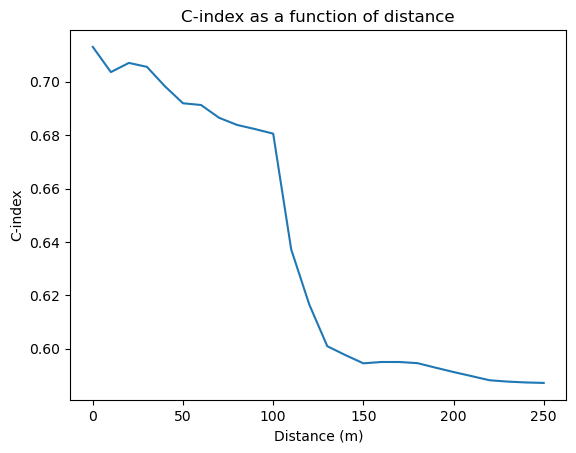

In [63]:
plt.plot(distances, c_indices)
plt.title("C-index as a function of distance")
plt.xlabel("Distance (m)")
plt.ylabel("C-index")

### Interpretation of the results

The C-index is decreasing as the distance increases. There is a significant drop in C-index when the distance parameter is 100m. After the drop, at around 150m, the C-index seems to plateau. The plateau might indicate that 150m would be a good value for the distance parameter.